In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [77]:
from qutip import *

In [14]:
q = thermal_dm(5,3)
q

Quantum object: dims = [[5], [5]], shape = [5, 5], type = oper, isherm = True
Qobj data =
[[ 0.32778489  0.          0.          0.          0.        ]
 [ 0.          0.24583867  0.          0.          0.        ]
 [ 0.          0.          0.184379    0.          0.        ]
 [ 0.          0.          0.          0.13828425  0.        ]
 [ 0.          0.          0.          0.          0.10371319]]

In [12]:
# the dimension, or composite Hilbert state space structure
q.dims

[[5], [5]]

In [13]:
# the shape of the matrix data representation
q.shape

[5, 5]

In [22]:
q1 = fock_dm(5,4)
print q1
q2 = coherent_dm(5, 2)
print q2

Quantum object: dims = [[5], [5]], shape = [5, 5], type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]]
Quantum object: dims = [[5], [5]], shape = [5, 5], type = oper, isherm = True
Qobj data =
[[ 0.02209443  0.03218325  0.07732171  0.02857714  0.11736783]
 [ 0.03218325  0.04687885  0.11262855  0.04162611  0.17096064]
 [ 0.07732171  0.11262855  0.27059516  0.10000861  0.41074063]
 [ 0.02857714  0.04162611  0.10000861  0.03696194  0.15180463]
 [ 0.11736783  0.17096064  0.41074063  0.15180463  0.62346961]]


In [23]:
tensor (basis(2,0), basis (5,0))

Quantum object: dims = [[2, 5], [1, 1]], shape = [10, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

In [35]:
g = basis (2,0)
e = basis (2,1)
print e,g

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.]
 [ 1.]] Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]]


In [28]:
sigmax()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]]

In [32]:
a = destroy (2)
a

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = False
Qobj data =
[[ 0.  1.]
 [ 0.  0.]]

In [36]:
a*g

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]]

In [39]:
b = create (2)
b

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = False
Qobj data =
[[ 0.  0.]
 [ 1.  0.]]

In [40]:
b*g

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.]
 [ 1.]]

In [168]:
N = 2
delta = -1 
omega_z = 1
g = 0.2
eta = 0.1
a = tensor(identity (2), destroy (N))
sm = tensor(destroy (2), identity (N))
sz = tensor(sigmaz(), identity (N))

In [169]:
H = -0.5 * delta * sz + omega_z * (a.dag() * a )\
- 0.5 * g * ((-1j * eta *(a + a.dag())).expm() * sm + (1j * eta *(a + a.dag())).expm() * sm.dag())
H

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 0.50000000+0.j          0.00000000+0.j         -0.09950042+0.j
   0.00000000+0.00998334j]
 [ 0.00000000+0.j          1.50000000+0.j          0.00000000+0.00998334j
  -0.09950042+0.j        ]
 [-0.09950042+0.j          0.00000000-0.00998334j -0.50000000+0.j
   0.00000000+0.j        ]
 [ 0.00000000-0.00998334j -0.09950042+0.j          0.00000000+0.j
   0.50000000+0.j        ]]

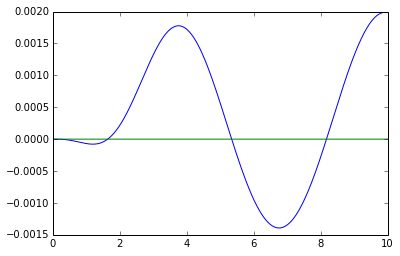

In [170]:
#from math import sqrt
gamma = 0.5
g = basis (2,0)
e = basis (2,1)
q = fock_dm (N,N-1)
psi0 = tensor (e, q)
#print psi0
#print  (sm.dag() * sm * psi0).ptrace()
#sx = tensor(sigmax(), identity (N))
times = np.arange (0.0, 10.0, 0.0001)


c_op_list = []
step = 0.001
us = np.arange (-1, 1, step)
for u in us:
    c_op_list.append(np.sqrt(gamma * step * (1 + u**2) *0.75) * sm * (1j * eta * u *(a + a.dag())).expm())
    
#c_op_list
result = mesolve(H, psi0, times, c_op_list, [sm.dag() * sm, a.dag() * a])
plt.plot(times, result.expect[0])
plt.plot(times, result.expect[1])

In [146]:
# Kernel always die :-)
#from math import sqrt
gamma = 0.5
g = basis (2,0)
e = basis (2,1)
q = fock_dm (5,2)
psi0 = tensor (g, q)
psi0

Quantum object: dims = [[2, 5], [1, 5]], shape = [10, 5], type = other
Qobj data =
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]

In [43]:
np.r_[-1: 1: 100j]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [41]:
2.0/99

0.020202020202020204

In [40]:
1-0.97979798

0.020202020000000043

In [49]:
a = np.r_[-1: 1: 100j]
a

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [53]:
np.arange(-1,1,0.01)

array([ -1.00000000e+00,  -9.90000000e-01,  -9.80000000e-01,
        -9.70000000e-01,  -9.60000000e-01,  -9.50000000e-01,
        -9.40000000e-01,  -9.30000000e-01,  -9.20000000e-01,
        -9.10000000e-01,  -9.00000000e-01,  -8.90000000e-01,
        -8.80000000e-01,  -8.70000000e-01,  -8.60000000e-01,
        -8.50000000e-01,  -8.40000000e-01,  -8.30000000e-01,
        -8.20000000e-01,  -8.10000000e-01,  -8.00000000e-01,
        -7.90000000e-01,  -7.80000000e-01,  -7.70000000e-01,
        -7.60000000e-01,  -7.50000000e-01,  -7.40000000e-01,
        -7.30000000e-01,  -7.20000000e-01,  -7.10000000e-01,
        -7.00000000e-01,  -6.90000000e-01,  -6.80000000e-01,
        -6.70000000e-01,  -6.60000000e-01,  -6.50000000e-01,
        -6.40000000e-01,  -6.30000000e-01,  -6.20000000e-01,
        -6.10000000e-01,  -6.00000000e-01,  -5.90000000e-01,
        -5.80000000e-01,  -5.70000000e-01,  -5.60000000e-01,
        -5.50000000e-01,  -5.40000000e-01,  -5.30000000e-01,
        -5.20000000e-01,

In [65]:
from numpy import *
ps0 = zeros(5, dtype=complex128)
ps0[3] = 1
rho0_gg = diag(r_[ps0])
rho0_ee = zeros_like(rho0_gg)
rho0_ge = zeros_like(rho0_gg)
rho0 = array([rho0_gg, rho0_ee, rho0_ge])
print rho0_gg

[[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]]


In [68]:
ps = diag(rho0_gg)
n, =  ps.shape
print abs(ps.dot(r_[arange(n)]))

3.0
